In [1]:
# Question 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
titanic=sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic['age'].isnull().sum()

177

In [8]:
null_columns=titanic.columns[titanic.isnull().any()]
print(null_columns)

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')


In [10]:
titanic['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [11]:
X=titanic[['pclass','sex','age','sibsp','parch','embarked','class']]
y=titanic['survived']

In [12]:
# handle missing values
X['age'].fillna(X['age'].median(), inplace=True)
X['embarked'].fillna(X['embarked'].mode()[0], inplace=True)

C:\Users\nikib\AppData\Local\Temp\ipykernel_37940\2166521311.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
C:\Users\nikib\AppData\Local\Temp\ipykernel_37940\2166521311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inplace=True)
C:\Users\nikib\AppDat

In [14]:
null_cols=X.columns[X.isnull().any()]
print(null_cols)

Index([], dtype='object')


In [15]:
# encode categorical variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   embarked  891 non-null    object  
 6   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


In [16]:
X=pd.get_dummies(X, drop_first=True)

In [18]:
# train test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# model training
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# predict
y_pred=clf.predict(X_test)

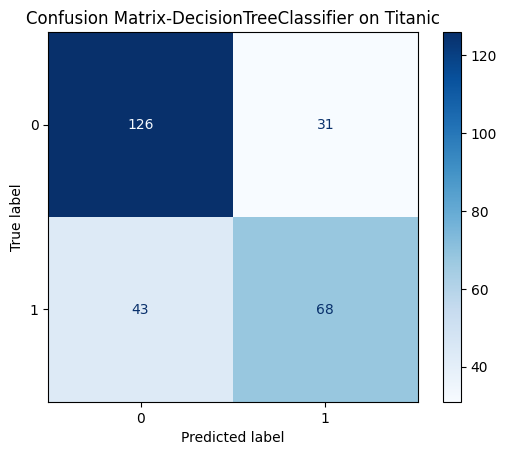

In [23]:
# confsuion matrix
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix-DecisionTreeClassifier on Titanic')
plt.show()

In [43]:
# Question 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [26]:
df=pd.read_csv("imdb_dataset.csv")

In [27]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [28]:
X=df['review']
y=df['sentiment']

vectorizer=CountVectorizer()
X_vectorized=vectorizer.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

In [31]:
nb=MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [32]:
y_pred=nb.predict(X_test)

In [37]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Accuracy Score: 0.8485
Classification Report:               precision    recall  f1-score   support

    negative       0.83      0.88      0.85      7411
    positive       0.87      0.82      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



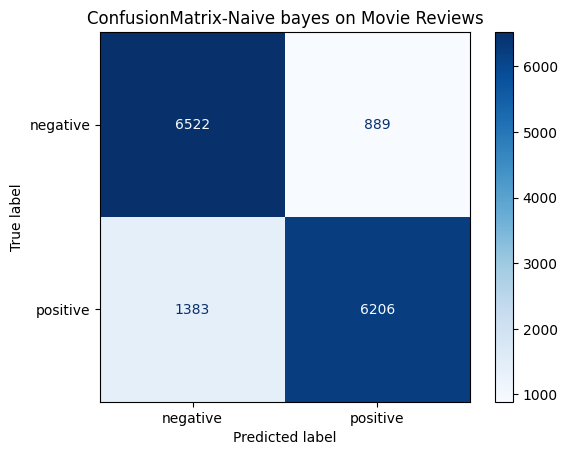

In [44]:
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('ConfusionMatrix-Naive bayes on Movie Reviews')
plt.show()

In [47]:
example_review=['The movie had a calm and relaxing vibe. Must watch!']
test_review=vectorizer.transform(example_review)
prediction=nb.predict(test_review)
print(f"{example_review[0]}: {prediction[0]}")

The movie had a calm and relaxing vibe. Must watch!: positive



Random State: 0
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3

Random State: 10
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3

Random State: 20
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3

Random State: 42
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3

Random State: 99
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3


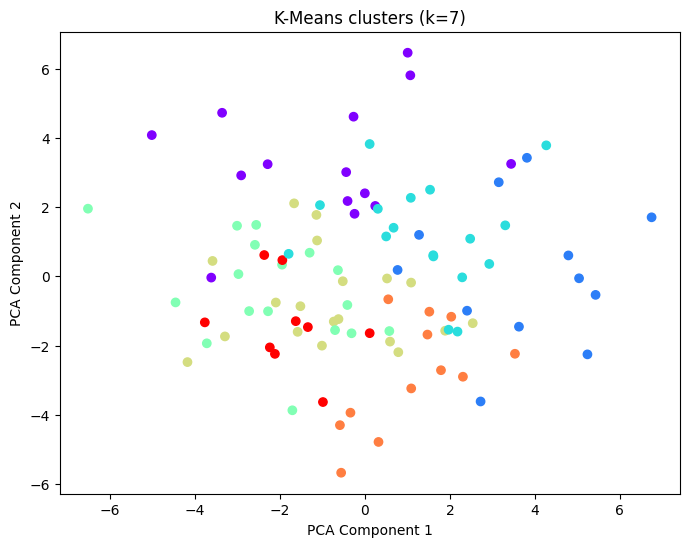

In [65]:
# Question 6
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df=pd.read_csv('tissue_gene_expression.csv')
X=df.drop("Tissue", axis=1)
y=df["Tissue"]

for seed in [0,10,20,42,99]:
    kmeans=KMeans(n_clusters=7, random_state=42, n_init=10)
    clusters=kmeans.fit_predict(X)
    print(f"\nRandom State: {seed}")
    print(pd.crosstab(y,clusters))

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='rainbow')
plt.title('K-Means clusters (k=7)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [80]:
# Question 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

iris=load_iris()
X=iris.data
y=iris.target

y_binary=(y==0).astype(int)

X_train, X_test, y_train, y_test=train_test_split(X, y_binary, test_size=0.3, random_state=42)

model=LogisticRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")

new_flower = [[5.1, 3.5, 1.4, 0.2]]
prediction=model.predict(new_flower)
print(prediction)
if prediction[0]==1:
    print("Iris setosa")
else:
    print("Not iris setosa")

accuracy: 1.0
recall: 1.0
precision: 1.0
[1]
Iris setosa


Mean Squared Error: 16333649.858200978
R² Score: 0.9452146208492591


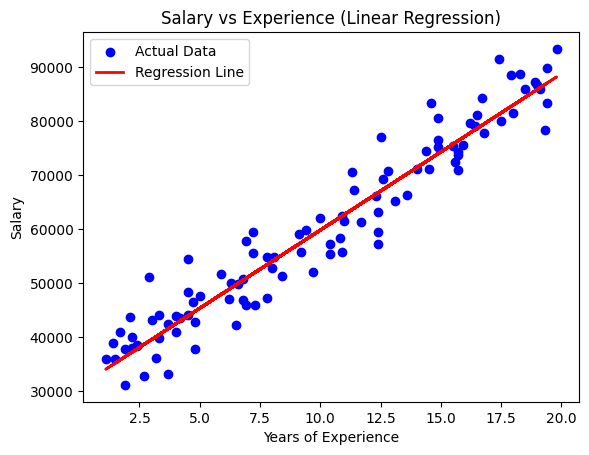

C:\Users\nikib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[15].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [87]:
# Question 4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('employee_salary_data.csv')

X=df[['Years_of_Experience']]
y=df['Salary']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print("Mean Squared Error:", mse) 
print("R² Score:", r2) 
plt.scatter(X, y, color="blue", label="Actual Data") 
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line") 
plt.xlabel("Years of Experience") 
plt.ylabel("Salary") 
plt.title("Salary vs Experience (Linear Regression)") 
plt.legend() 
plt.show() 

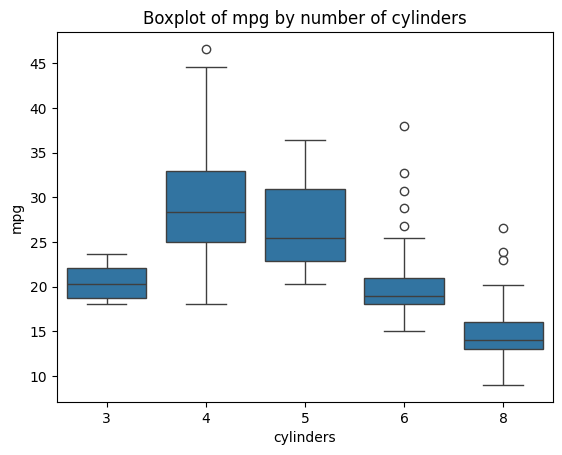

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

mtcars=sns.load_dataset('mpg').dropna()

sns.boxplot(x="cylinders", y="mpg", data=mtcars)
plt.title("Boxplot of mpg by number of cylinders")
plt.show()

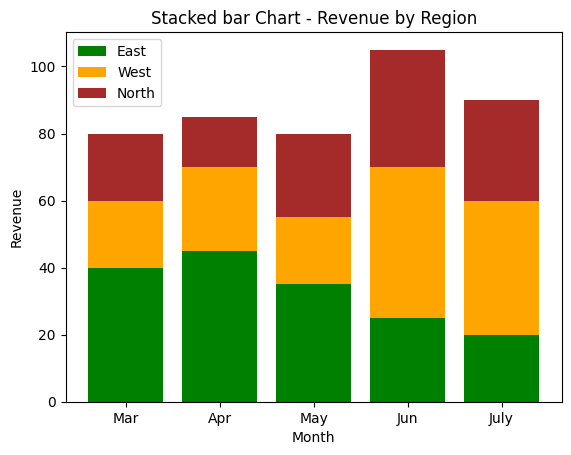

In [7]:
import numpy as np
import matplotlib.pyplot as plt

colors=['green','orange','brown']
months=['Mar','Apr','May','Jun','July']
regions=['East','West','North']

revenue_east=[40,45,35,25,20]
revenue_west=[20,25,20,45,40]
revenue_north=[20,15,25,35,30]

bar_width=0.5
x=np.arange(len(months))

plt.bar(x,revenue_east, color=colors[0], label=regions[0])
plt.bar(x,revenue_west, bottom=revenue_east, color=colors[1], label=regions[1])
plt.bar(x,revenue_north, bottom=np.array(revenue_east)+np.array(revenue_west), color=colors[2], label=regions[2])

plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Stacked bar Chart - Revenue by Region")
plt.xticks(x, months)
plt.legend()
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('moviesData.csv')

data.head()

,title,critics_score,audience_score,genre,year
0,Inception,91,94,Sci-Fi,2010
1,Avatar,82,85,Action,2009
2,Titanic,89,92,Romance,1997
3,The Dark Knight,94,96,Action,2008
4,Interstellar,87,90,Sci-Fi,2014


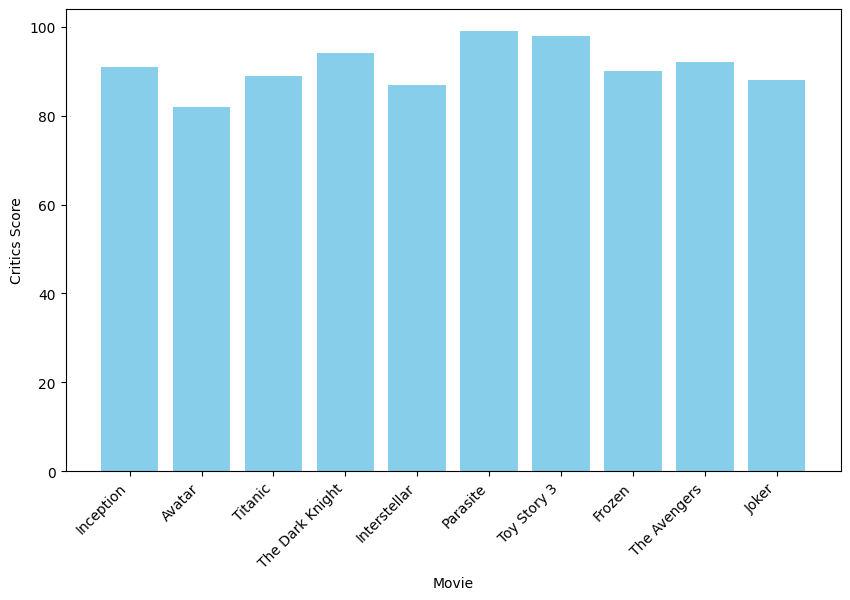

In [9]:
first_10=data.head(10)

plt.figure(figsize=(10,6))
plt.bar(first_10['title'], first_10['critics_score'], color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Critics Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
X=titanic[['pclass','sex','age','sibsp','parch','embarked','class']]
y=titanic['survived']
X['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [30]:
X['age'].fillna(X['age'].median(), inplace=True)
X['embarked'].fillna(X['embarked'].mode()[0], inplace=True)

X=pd.get_dummies(X, drop_first=True)

C:\Users\nikib\AppData\Local\Temp\ipykernel_20428\1972104454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].median(), inplace=True)
C:\Users\nikib\AppData\Local\Temp\ipykernel_20428\1972104454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].median(), inplace=True)
C:\Users\nikib\AppDat

In [31]:
X['age'].isnull().sum()

0

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [33]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred=clf.predict(X_test)

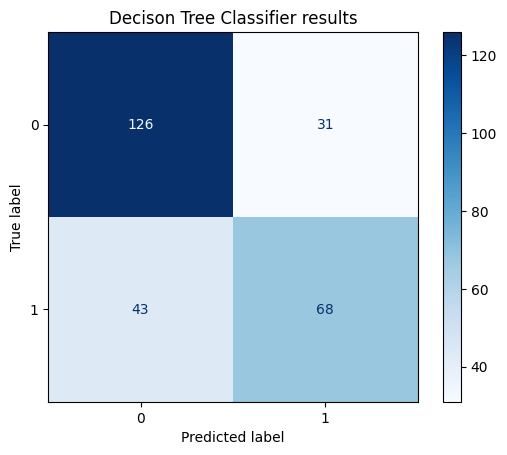

In [35]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decison Tree Classifier results")
plt.show()

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

data=pd.read_csv("imdb_dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [42]:
X=data['review']
y=data['sentiment']

In [43]:
vectorizer=CountVectorizer()
X_vectorized=vectorizer.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

In [58]:
nb=MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [59]:
y_pred=nb.predict(X_test)

In [60]:
print(f"Accuarcy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Accuarcy score: 0.8485
Classification Report:               precision    recall  f1-score   support

    negative       0.83      0.88      0.85      7411
    positive       0.87      0.82      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



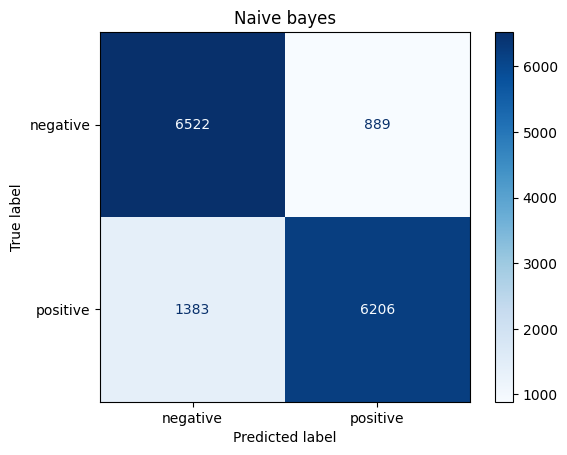

In [61]:
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Naive bayes')
plt.show()

In [63]:
example_review=['Great movie. Enjoyed every second of it']
review=vectorizer.transform(example_review)
prediction=nb.predict(review)
print(f"{example_review[0]}: {prediction[0]}")

Great movie. Enjoyed every second of it: positive


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [71]:
df=pd.read_csv("tissue_gene_expression.csv")
df.head()

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,Tissue
0,10.993428,9.723471,11.295377,13.046060,9.531693,9.531726,13.158426,11.534869,9.061051,11.085120,Brain
1,9.073165,9.068540,10.483925,6.173440,6.550164,8.875425,7.974338,10.628495,8.183952,7.175393,Lung
2,12.931298,9.548447,10.135056,7.150504,8.911235,10.221845,7.698013,10.751396,8.798723,9.416613,Liver
3,8.796587,13.704556,9.973006,7.884578,11.645090,7.558313,10.417727,6.080660,7.343628,10.393722,Lung
4,11.476933,10.342737,9.768703,9.397793,7.042956,8.560312,9.078722,12.114244,10.687237,6.473920,Brain


In [72]:
X=df.drop('Tissue', axis=1)
y=df['Tissue']

In [73]:
for seed in [0,10,20,42,99]:
    kmeans=KMeans(n_clusters=7, random_state=42, n_init=10)
    clusters=kmeans.fit_predict(X)
    print(f"Random State: {seed}")
    print(pd.crosstab(y,clusters))

Random State: 0
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3
Random State: 10
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3
Random State: 20
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3
Random State: 42
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3
Random State: 99
col_0   0  1  2  3  4  5  6
Tissue                     
Brain   5  3  6  4  7  5  1
Heart   4  2  5  5  3  2  3
Liver   2  1  2  4  6  4  2
Lung    3  6  4  4  3  1  3


In [75]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

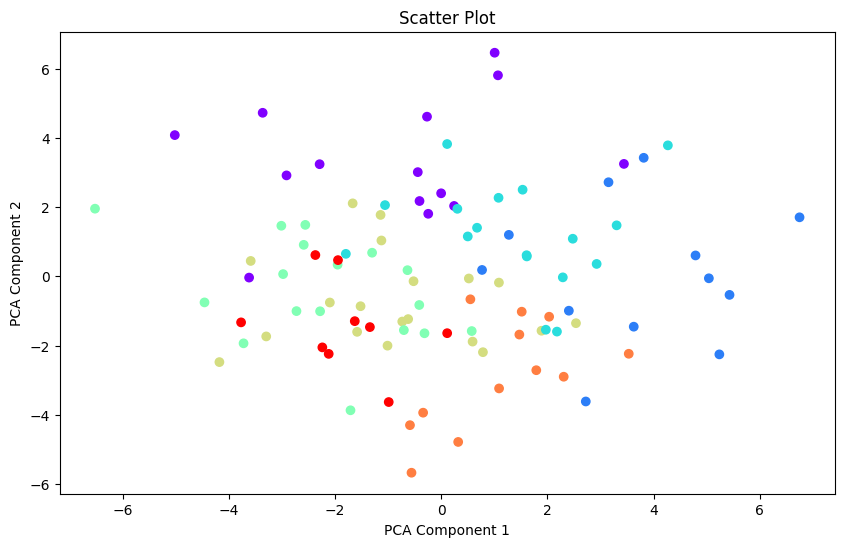

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='rainbow')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot')
plt.show()

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [80]:
df=load_iris()

In [84]:
X=df.data
y=df.target

In [87]:
y_binary=(y==0).astype(int)

In [88]:
X_train, X_test, y_train, y_test=train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [89]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [90]:
y_pred=model.predict(X_test)

In [93]:
print(f"accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"precision score: {precision_score(y_test, y_pred):.4f}")
print(f"recall score: {recall_score(y_test, y_pred):.4f}")

accuracy score: 1.0000
precision score: 1.0000
recall score: 1.0000


In [94]:
example=[[5.4,4.1,1.2,2.4]]
prediction=model.predict(example)
if(prediction==1):
    print("Iris Setosa")
else:
    print("Not iris setosa")

Iris Setosa


In [97]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
df=pd.read_csv('employee_salary_data.csv')

In [99]:
df.head()

,Employee_ID,Years_of_Experience,Salary
0,1,8.1,54735.24
1,2,19.1,85804.96
2,3,14.9,75158.80
3,4,12.4,57262.16
4,5,4.0,40901.64


In [103]:
X=df[['Years_of_Experience']]
y=df['Salary']

In [104]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred=model.predict(X_test)

In [108]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}')
print(f'r2 score: {r2_score(y_test, y_pred):.4f}')

Mean Squared Error: 15771910.4005
r2 score: 0.9548


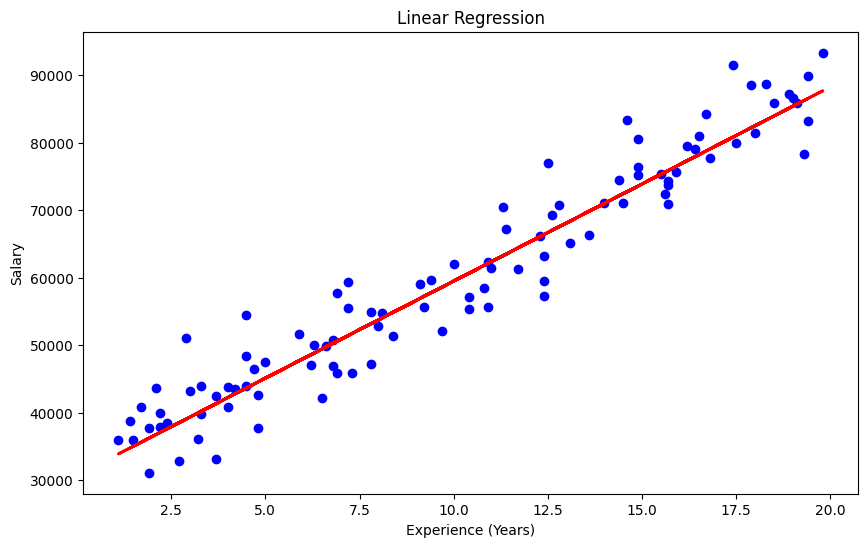

In [111]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Linear Regression')
plt.show()

In [112]:
df=pd.read_csv('house_price_data.csv')
df.head()

,SquareFootage,Price
0,3674,545317
1,1360,188944
2,1794,195173
3,1630,208507
4,1595,216218


In [117]:
X=df[['SquareFootage']]
y=df['Price']

In [118]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
model=LinearRegression()

In [120]:
model.fit(X_train, y_train)

LinearRegression()

In [121]:
y_pred=model.predict(X_test)

In [122]:
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

MSE: 2273219080.1994


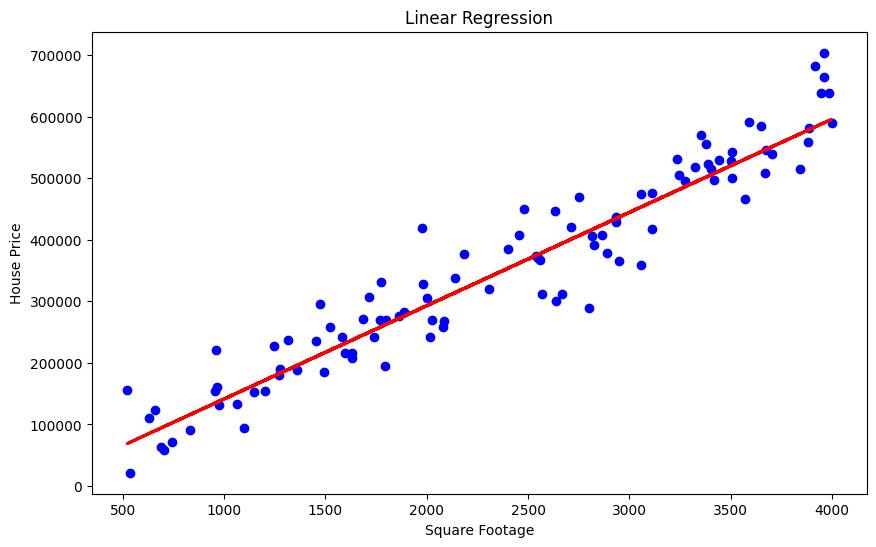

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression line")
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('Linear Regression')
plt.show()

In [129]:
new_square_footage=[[2555]]
prediction=model.predict(new_square_footage)
print(f"Prediction : {prediction[0]}")

Prediction : 376954.53900626156


C:\Users\nikib\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
# Question 7
import pandas as pd 
from mlxtend.frequent_patterns import fpgrowth, association_rules 
dataset = [ 
['milk', 'bread', 'nuts', 'apple'], 
['milk', 'bread', 'apple'], 
['milk', 'bread'], 
['milk', 'bread', 'apple'], 
['bread', 'nuts'] 
] 
from mlxtend.preprocessing import TransactionEncoder 
te = TransactionEncoder() 
te_ary = te.fit(dataset).transform(dataset) 
df = pd.DataFrame(te_ary, columns=te.columns_) 
print("One-hot encoded dataset:\n") 
print(df) 
frequent_itemsets = fpgrowth(df, min_support=0.001, use_colnames=True) 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8) 
print("\nFrequent Itemsets:\n", frequent_itemsets) 
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence']]) 
print("\n--- FP-Tree Evolution (Simplified) ---") 
fp_tree = {} 
for i, transaction in enumerate(dataset, 1): 
    current = fp_tree 
    for item in sorted(transaction):  # sort items lexicographically 
        if item not in current: 
            current[item] = {} 
            current = current[item] 
    print(f"\nAfter Transaction {i}: {transaction}") 
    print(fp_tree) 

One-hot encoded dataset:

   apple  bread   milk   nuts
0   True   True   True   True
1   True   True   True  False
2  False   True   True  False
3   True   True   True  False
4  False   True  False   True

Frequent Itemsets:
     support                    itemsets
0       1.0                     (bread)
1       0.8                      (milk)
2       0.6                     (apple)
3       0.4                      (nuts)
4       0.8               (milk, bread)
5       0.6               (milk, apple)
6       0.6              (bread, apple)
7       0.6        (milk, bread, apple)
8       0.4               (nuts, bread)
9       0.2               (nuts, apple)
10      0.2                (nuts, milk)
11      0.2        (nuts, bread, apple)
12      0.2         (nuts, milk, bread)
13      0.2         (nuts, milk, apple)
14      0.2  (nuts, milk, bread, apple)

Association Rules:
              antecedents     consequents  support  confidence
0                 (milk)         (bread)      0.8 

C:\Users\nikib\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [8]:
# Question 8
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules 
dataset = [ 
['milk', 'bread', 'nuts', 'apple'], 
['milk', 'bread', 'apple'], 
['milk', 'bread'], 
['milk', 'bread', 'apple'], 
['bread', 'nuts'], 
['milk', 'apple', 'bread'], 
['bread', 'butter'], 
['milk', 'bread', 'butter'], 
] 
te = TransactionEncoder() 
te_ary = te.fit(dataset).transform(dataset) 
df = pd.DataFrame(te_ary, columns=te.columns_) 
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True) 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8) 
rules_sorted = rules.sort_values(by='confidence', ascending=False) 
print("\nTop 5 Association Rules (sorted by confidence):\n") 
for i, row in rules_sorted.head(5).iterrows(): 
    strong = "STRONG RULE" if row['confidence'] >= 0.9 else "" 
    print(f"Rule: {set(row['antecedents'])} → {set(row['consequents'])}") 
    print(f"Support: {row['support']:.3f}, Confidence: {row['confidence']:.3f}, Lift: {row['lift']:.3f} {strong}\n") 


Top 5 Association Rules (sorted by confidence):

Rule: {'apple'} → {'bread'}
Support: 0.500, Confidence: 1.000, Lift: 1.000 STRONG RULE

Rule: {'apple'} → {'milk'}
Support: 0.500, Confidence: 1.000, Lift: 1.333 STRONG RULE

Rule: {'nuts', 'milk'} → {'bread', 'apple'}
Support: 0.125, Confidence: 1.000, Lift: 2.000 STRONG RULE

Rule: {'nuts', 'bread', 'apple'} → {'milk'}
Support: 0.125, Confidence: 1.000, Lift: 1.333 STRONG RULE

Rule: {'nuts', 'milk', 'apple'} → {'bread'}
Support: 0.125, Confidence: 1.000, Lift: 1.000 STRONG RULE



C:\Users\nikib\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [12]:
# Question 9
import pandas as pd 
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import fpgrowth, association_rules 
dataset = [ 
['milk', 'bread', 'eggs'], 
['milk', 'bread'], 
['milk', 'apple', 'bread'], 
['bread', 'butter'], 
['milk', 'bread', 'butter'], 
['apple', 'bread', 'eggs'], 
['milk', 'bread', 'apple', 'butter'] 
] 
te = TransactionEncoder() 
te_data = te.fit(dataset).transform(dataset) 
df = pd.DataFrame(te_data, columns=te.columns_) 
print("Transaction Data (One-hot encoded):\n") 
print(df.head()) 
frequent_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True) 
print("\n Frequent Itemsets (Support ≥ 0.2):\n") 
print(frequent_itemsets) 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6) 
rules_sorted = rules.sort_values(by="confidence", ascending=False) 
print("\n Top 5 Association Rules (sorted by confidence):\n") 
for i, row in rules_sorted.head(5).iterrows(): 
    strong = " STRONG RULE" if row['confidence'] >= 0.9 else "" 
    print(f"Rule: {set(row['antecedents'])} → {set(row['consequents'])}") 
    print(f"Support: {row['support']:.3f}, Confidence: {row['confidence']:.3f}, Lift: {row['lift']:.3f} {strong}\n") 
print(" Insights:") 
print("• Strong rules (confidence ≥ 0.9) reveal reliable purchasing patterns.") 
print("• For instance, if {'milk'} → {'bread'}, it means customers buying milk often buy bread too.") 
print("• Businesses can use these insights to design combo offers, product placements, or recommendations.") 

Transaction Data (One-hot encoded):

   apple  bread  butter   eggs   milk
0  False   True   False   True   True
1  False   True   False  False   True
2   True   True   False  False   True
3  False   True    True  False  False
4  False   True    True  False   True

 Frequent Itemsets (Support ≥ 0.2):

     support               itemsets
0   1.000000                (bread)
1   0.714286                 (milk)
2   0.285714                 (eggs)
3   0.428571                (apple)
4   0.428571               (butter)
5   0.714286          (milk, bread)
6   0.285714          (eggs, bread)
7   0.428571         (bread, apple)
8   0.285714          (milk, apple)
9   0.285714   (milk, bread, apple)
10  0.428571        (butter, bread)
11  0.285714         (butter, milk)
12  0.285714  (butter, milk, bread)

 Top 5 Association Rules (sorted by confidence):

Rule: {'milk'} → {'bread'}
Support: 0.714, Confidence: 1.000, Lift: 1.000  STRONG RULE

Rule: {'eggs'} → {'bread'}
Support: 0.286, Confidence:

C:\Users\nikib\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
